In [2]:
import pandas as pd
import numpy as np

In [3]:
cleaned_features = pd.read_csv("larger_imputed_features.csv", encoding='utf-8')

In [4]:
target = cleaned_features.GENTRIFIED.values

In [5]:
cleaned_features.drop('GENTRIFIED', axis=1, inplace=True)

In [6]:
novel_features = cleaned_features[['''ACS_09_S2101_HC03_EST_VC37_Nonveterans__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Bachelor's_degree_or_higher_100scale''',
'ACS_09_B25018_HD01_VD01_Estimate__Median_number_of_rooms_100scale',
'ACS_09_B25081_HD01_VD07_Estimate__Housing_units_with_a_mortgage,_contract_to_purchase,_or_similar_debt__No_second_mortgage_and_no_home_equity_loan_100scale',
'ACS_09_S2201_HC02_EST_VC03_Households_receiving_food_stamps__Estimate__Households__With_children_under_18_years_100scale', 
'''ACS_09_S2101_HC01_EST_VC36_Total__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Some_college_or_associate's_degree_100scale''']]

In [ ]:
novel_features.to_csv('five_features.csv', encoding='utf-8', header=False)

In [7]:
novel_features.shape

(3874, 5)

In [8]:
novel_features.columns

Index(['ACS_09_S2101_HC03_EST_VC37_Nonveterans__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Bachelor's_degree_or_higher_100scale',
       'ACS_09_B25018_HD01_VD01_Estimate__Median_number_of_rooms_100scale',
       'ACS_09_B25081_HD01_VD07_Estimate__Housing_units_with_a_mortgage,_contract_to_purchase,_or_similar_debt__No_second_mortgage_and_no_home_equity_loan_100scale',
       'ACS_09_S2201_HC02_EST_VC03_Households_receiving_food_stamps__Estimate__Households__With_children_under_18_years_100scale',
       'ACS_09_S2101_HC01_EST_VC36_Total__Estimate__EDUCATIONAL_ATTAINMENT__Civilian_population_25_years_and_over__Some_college_or_associate's_degree_100scale'],
      dtype='object')

In [9]:
target.shape

(3874,)

In [10]:
features_array  = novel_features.values

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_array, target)

In [13]:
import tempfile

tree.export_graphviz(clf, out_file='tree.dot')     

In [18]:
import numpy as np

from sklearn.tree import _tree


def export_json(decision_tree, out_file=None, feature_names=None):
    """Export a decision tree in JSON format.

    This function generates a JSON representation of the decision tree,
    which is then written into `out_file`. Once exported, graphical renderings
    can be generated using, for example::

        $ dot -Tps tree.dot -o tree.ps      (PostScript format)
        $ dot -Tpng tree.dot -o tree.png    (PNG format)

    Parameters
    ----------
    decision_tree : decision tree classifier
        The decision tree to be exported to JSON.

    out : file object or string, optional (default=None)
        Handle or name of the output file.

    feature_names : list of strings, optional (default=None)
        Names of each of the features.

    Returns
    -------
    out_file : file object
        The file object to which the tree was exported.  The user is
        expected to `close()` this object when done with it.

    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn import tree

    >>> clf = tree.DecisionTreeClassifier()
    >>> iris = load_iris()

    >>> clf = clf.fit(iris.data, iris.target)
    >>> import tempfile
    >>> out_file = tree.export_json(clf, out_file=tempfile.TemporaryFile())
    >>> out_file.close()
    """
    import numpy as np

    from sklearn.tree import _tree

    def arr_to_py(arr):
        arr = arr.ravel()
        wrapper = float
        if np.issubdtype(arr.dtype, np.int):
            wrapper = int
        return map(wrapper, arr.tolist())


    def node_to_str(tree, node_id):
        node_repr = '"error": %.4f, "samples": %d, "value": %s' \
                    % (tree.init_error[node_id],
                       tree.n_samples[node_id],
                       arr_to_py(tree.value[node_id]))
        if tree.children_left[node_id] != _tree.TREE_LEAF:
            if feature_names is not None:
                feature = feature_names[tree.feature[node_id]]
            else:
                feature = "X[%s]" % tree.feature[node_id]

            label = '"label": "%s <= %.2f"' % (feature,
                                               tree.threshold[node_id])
            node_type = '"type": "split"'
        else:
            node_type = '"type": "leaf"'
            label = '"label": "Leaf - %d"' % node_id
        node_repr = ", ".join((node_repr, label, node_type))
        return node_repr

    def recurse(tree, node_id, parent=None):
        if node_id == _tree.TREE_LEAF:
            raise ValueError("Invalid node_id %s" % _tree.TREE_LEAF)

        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]

        # Open node with description
        out_file.write('{%s' % node_to_str(tree, node_id))

        # write children
        if left_child != _tree.TREE_LEAF:  # and right_child != _tree.TREE_LEAF
            out_file.write(', "children": [')
            recurse(tree, left_child, node_id)
            out_file.write(', ')
            recurse(tree, right_child, node_id)
            out_file.write(']')

        # close node
        out_file.write('}')

    if out_file is None:
        out_file = open("tree.json", "w")
    elif isinstance(out_file, basestring):
        out_file = open(out_file, "w")

    if isinstance(decision_tree, _tree.Tree):
        recurse(decision_tree, 0)
    else:
        recurse(decision_tree.tree_, 0)

    return out_file

In [32]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(features_array, target)

In [42]:
clf.predict_proba(features_array[:10])

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [32]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [34]:
target_predicted = logreg.predict(features_test)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.88258064516129031

In [36]:
logreg.score(features_test, target_test)

0.88258064516129031

In [40]:
logreg.coef_

array([[ 0.02860722, -0.00864706, -0.02134449, -0.00069299, -0.00900869]])

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[680   2]
 [ 89   4]]


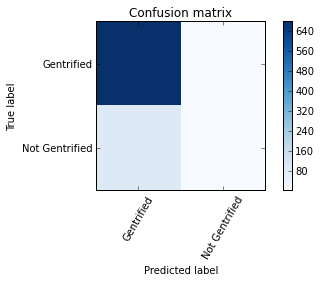

In [42]:
% matplotlib inline
import matplotlib.pyplot as plt

def plot_confusion(cm, target_names = ['Gentrified', 'Not Gentrified'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)

In [43]:
cm.sum(axis=1)

array([682,  93])

In [44]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[ 0.99706745  0.00293255]
 [ 0.95698925  0.04301075]]


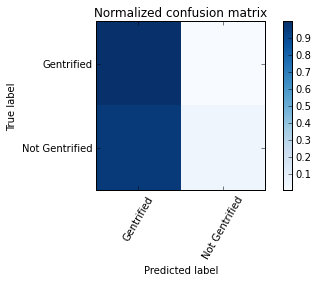

In [45]:
plot_confusion(cm_normalized, title="Normalized confusion matrix")

In [46]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                            target_names=['Gentrified', 'Not Gentrified']))

                precision    recall  f1-score   support

    Gentrified       0.88      1.00      0.94       682
Not Gentrified       0.67      0.04      0.08        93

   avg / total       0.86      0.88      0.83       775



In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

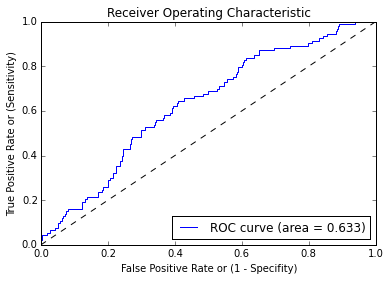

In [48]:
target_predicted_prob = logreg.predict_proba(features_test)
plot_roc_curve(target_test,target_predicted_prob)

In [49]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=3)

In [50]:
scores

array([ 0.88390093,  0.88226181,  0.88458559])

In [51]:
scores.min(), scores.max(), scores.mean()

(0.88226181254841207, 0.8845855925639039, 0.88358277796829521)

In [52]:
scores = cross_val_score(logreg, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.62430799609774446, 0.64628657054746819, 0.67355046486206938)

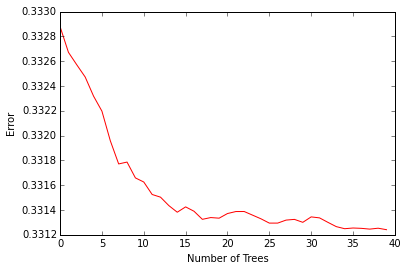

In [81]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import log_loss


errors = []
growing_rf = RandomForestClassifier(n_estimators=50, n_jobs=-1,  
                                    warm_start=True, random_state=1000, min_samples_leaf=100)
for i in range(40):
    growing_rf.fit(features_train, target_train)
    growing_rf.n_estimators += 10
    errors.append(log_loss(target, growing_rf.predict_proba(features_array)))

_ = plt.plot(errors, '-r')
plt.xlabel('Number of Trees')
plt.ylabel('Error')

In [69]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(features_array, target)

Wall time: 16.5 s


In [73]:
sorted(gs.grid_scores_, key = lambda x: x.mean_validation_score, reverse=True)

[mean: 0.65702, std: 0.03771, params: {'max_depth': 4, 'max_features': 1, 'learning_rate': 0.05},
 mean: 0.65533, std: 0.03289, params: {'max_depth': 3, 'max_features': 1, 'learning_rate': 0.05},
 mean: 0.65362, std: 0.02368, params: {'max_depth': 3, 'max_features': 0.5, 'learning_rate': 0.05},
 mean: 0.65055, std: 0.02040, params: {'max_depth': 3, 'max_features': 0.5, 'learning_rate': 0.1},
 mean: 0.64993, std: 0.02936, params: {'max_depth': 3, 'max_features': 1, 'learning_rate': 0.1},
 mean: 0.64611, std: 0.01371, params: {'max_depth': 4, 'max_features': 0.5, 'learning_rate': 0.05},
 mean: 0.63950, std: 0.03087, params: {'max_depth': 5, 'max_features': 0.5, 'learning_rate': 0.05},
 mean: 0.63296, std: 0.03521, params: {'max_depth': 4, 'max_features': 1, 'learning_rate': 0.1},
 mean: 0.63226, std: 0.03128, params: {'max_depth': 5, 'max_features': 1, 'learning_rate': 0.05},
 mean: 0.62628, std: 0.02130, params: {'max_depth': 4, 'max_features': 0.5, 'learning_rate': 0.1},
 mean: 0.61949

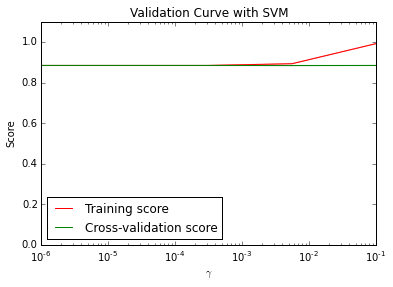

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.learning_curve import validation_curve

X, y = features_array, target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [102]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf = RandomForestRegressor()
rf.fit(features_array[:300], target[:300])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [89]:
instances = features_array[[300, 309]]
print("Instance 0 prediction:", rf.predict(instances[0]))
print("Instance 1 prediction:", rf.predict(instances[1]))

Instance 0 prediction: [ 0.]
Instance 1 prediction: [ 0.]
